In [6]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Configuraciones
plt.rcParams['figure.figsize'] = (12, 9) #Tamaño de los gráficos
pd.options.display.float_format = '{:20,.2f}'.format #configuración para sacar la notación cientifica

In [8]:
# El primer paso es importar la base. En el mismo momento, se indexa la variable fecha para luego poder resamplear los datos.

In [9]:
traffic_data = pd.read_csv("datasets/traffic_AR_CL_UY.csv", usecols = ["Fecha", "flow", "Site", "Device", "Loading", "Shipping", "Payments", "Review", "Congrats"], parse_dates=["Fecha"], index_col=["Fecha"])

In [10]:
traffic_data.head(10)

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats
Fecha,,,,,,,,
2019-03-01,cart,MLA,Android,0,7084,5313,3981,3731
2019-03-01,cart,MLA,Desktop,0,5419,4177,3580,3479
2019-03-01,cart,MLA,Mobile,0,2426,1832,1373,1290
2019-03-01,cart,MLA,iOS,0,1179,856,671,622
2019-03-01,direct,MLA,Android,160081,152310,124551,89380,83856
2019-03-01,direct,MLA,Desktop,98263,93506,80994,63941,62256
2019-03-01,direct,MLA,Mobile,69273,65385,51310,35665,33229
2019-03-01,direct,MLA,iOS,29215,27378,23245,17899,16835
2019-03-01,direct,MLC,Desktop,14970,14818,12629,10444,9827


In [11]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7709 entries, 2019-03-01 to 2020-06-30
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   flow      7709 non-null   object
 1   Site      7709 non-null   object
 2   Device    7709 non-null   object
 3   Loading   7709 non-null   int64 
 4   Shipping  7709 non-null   int64 
 5   Payments  7709 non-null   int64 
 6   Review    7709 non-null   int64 
 7   Congrats  7709 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 542.0+ KB


In [12]:
traffic_data["Weekday"] = traffic_data.index.day_name()

In [13]:
# El objetivo general del práctico es realizar una anáilsis exploratorio de las observaciones del dataset.

# Se sugiere explorar las series de forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los índices analizados que nos ayude a modelar las series y hacer pronósticos.

# Como los valores observados se indican en relación al tiempo, este tipo de datos se conocen como series temporales, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. El siguiente tutorial puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.

# Para los siguientes puntos elija:

## Un site por analizar
## Un tipo de flujo de compra (compra directa versus modo carrito)
## Dos plataformas ( Se sugiere tomar una Web Desktop o Mobile y otra de las applicaciones Android o iOS: Desktop vs Android
## De necesitarlo deberá resamplear los valores a nivel de día como mínimo
## Una vez ejecutado los pasos anteriores debería contar con 2 series temporales (y no todo el dataset) referidas al mismo pais pero en 2 plataformas diferentes.

In [14]:
traffic_data.Site.value_counts()

MLA    3903
MLC    1910
MLU    1896
Name: Site, dtype: int64

In [15]:
# Como puede apreciarse, Mercado Libre Argentina es el sitio que cuenta con mas observaciones. Por este motivo,
# será objeto de análisis.

C:\Users\genes\anaconda3\envs\ddatos21_ment_tp1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Site', ylabel='count'>

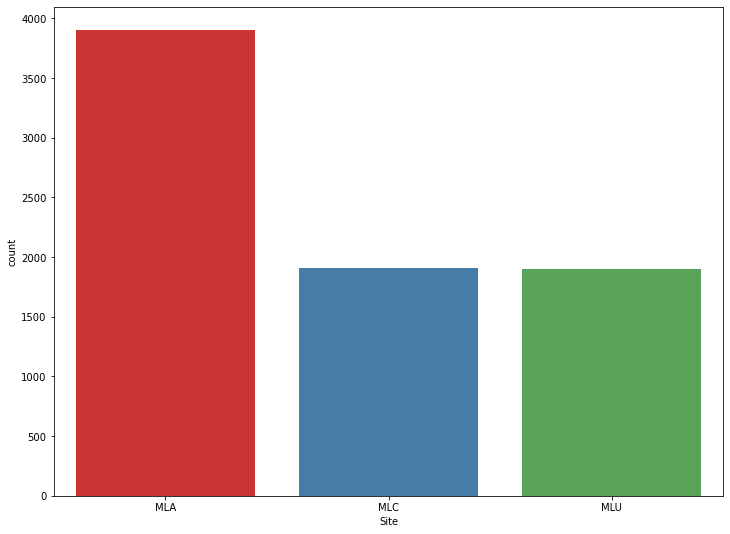

In [16]:
sns.countplot(traffic_data.Site, palette="Set1")

In [17]:
traffic_data.flow.value_counts()

direct    5746
cart      1963
Name: flow, dtype: int64

In [18]:
# Lo mismo sucede con el flujo de compra directa, por lo que es elegida para analizarse.

C:\Users\genes\anaconda3\envs\ddatos21_ment_tp1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='flow', ylabel='count'>

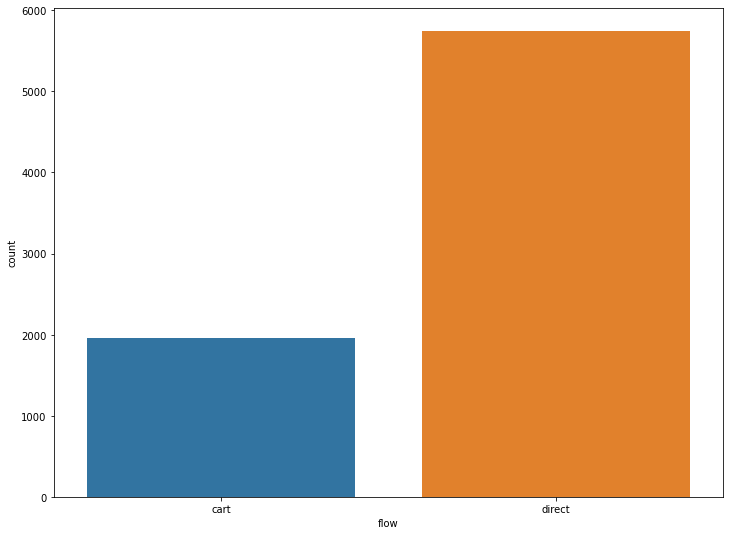

In [19]:
sns.countplot(traffic_data.flow)

In [20]:
min=traffic_data.index.min()
print(min)
max=traffic_data.index.max()
print(max)
dif=(max-min).days
print("El periodo de tiempo analizado es de:", dif, "días")

2019-03-01 00:00:00
2020-06-30 00:00:00
El periodo de tiempo analizado es de: 487 días


In [21]:
traffic_data.groupby(["Site","flow"]).Device.value_counts()

Site  flow    Device 
MLA   cart    Android    488
              Desktop    488
              iOS        488
              Mobile     487
      direct  Android    488
              Desktop    488
              Mobile     488
              iOS        488
MLC   cart    Desktop      6
              Mobile       6
      direct  Desktop    488
              Mobile     488
              Android    461
              iOS        461
MLU   direct  Desktop    487
              Mobile     487
              Android    461
              iOS        461
Name: Device, dtype: int64

In [22]:
# Dado que el periodo bajo análisis es de 487 días, se trabajará con las plataformas Desktop y Android por no contar con valores
# nulos.

In [23]:
# Se definen 3 bases: una que contempla las dos plataformas -Desktop & Android- en conjunto y además, una con los datos
# individuales de cada plataforma para analizarlas por separado. 

In [24]:
df_traffic=traffic_data[traffic_data.Site==("MLA")]
df_traffic=df_traffic[df_traffic.flow==("direct")]
df_traffic = df_traffic[(df_traffic.Device==("Android"))|(df_traffic.Device==("Desktop"))]
df_traffic["indice"] = df_traffic["Congrats"] / df_traffic["Loading"]

df_traffic_android = df_traffic[df_traffic.Device==("Android")]
df_traffic_desktop = df_traffic[df_traffic.Device==("Desktop")]

In [25]:
# Se proponen las siguientes actividades:

# Determine el tipo de variables y el período de tiempo bajo análisis
 
# Indague sobre la existencia de valores faltantes.

# ¿Cómo trataría a los faltantes? ¿Por qué? (El tratamiento de valores faltantes será parte del práctico de curación y 
# pueden omitirlos, en caso de necesitar inputar valores pueden tomar periodos que los omitan)

## Analice las distribuciones por medio de gráficos(por ejemplo: histogramas y boxplots) y medidas de estadística 
# descriptiva (por ejemplo: media, varianza y coeficiente de variación). Puede derivar alguna afirmación del análisis 
# de los coeficientes de asimetría y kurtosis

In [26]:
# Como se mencionó anteriormente, el periodo de tiempo bajo análisis es de 487 días (16 meses). El tipo de variables con 
# las que se trabajará, son las siguientes:

In [27]:
df_traffic_android.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 488 entries, 2019-03-01 to 2020-06-30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flow      488 non-null    object 
 1   Site      488 non-null    object 
 2   Device    488 non-null    object 
 3   Loading   488 non-null    int64  
 4   Shipping  488 non-null    int64  
 5   Payments  488 non-null    int64  
 6   Review    488 non-null    int64  
 7   Congrats  488 non-null    int64  
 8   Weekday   488 non-null    object 
 9   indice    488 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 41.9+ KB


In [28]:
df_traffic_desktop.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 488 entries, 2019-03-01 to 2020-06-30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flow      488 non-null    object 
 1   Site      488 non-null    object 
 2   Device    488 non-null    object 
 3   Loading   488 non-null    int64  
 4   Shipping  488 non-null    int64  
 5   Payments  488 non-null    int64  
 6   Review    488 non-null    int64  
 7   Congrats  488 non-null    int64  
 8   Weekday   488 non-null    object 
 9   indice    488 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 41.9+ KB


In [29]:
# Para el caso de las variables elegidas no hay valores faltantes. Por esto, no se realizará un tratamiento especial.

In [30]:
# En primer lugar, para ver el comportamiento de los datos como serie de tiempo, se realiza un gráfico de líneas. A los fines
# de quitar el ruido de la frecuencia diaria de los datos, se resamplea la base con el promedio de ventas semanal y se grafica
# la totalidad del periodo bajo análisis.

Text(0, 0.5, 'Cantidad de Ventas')

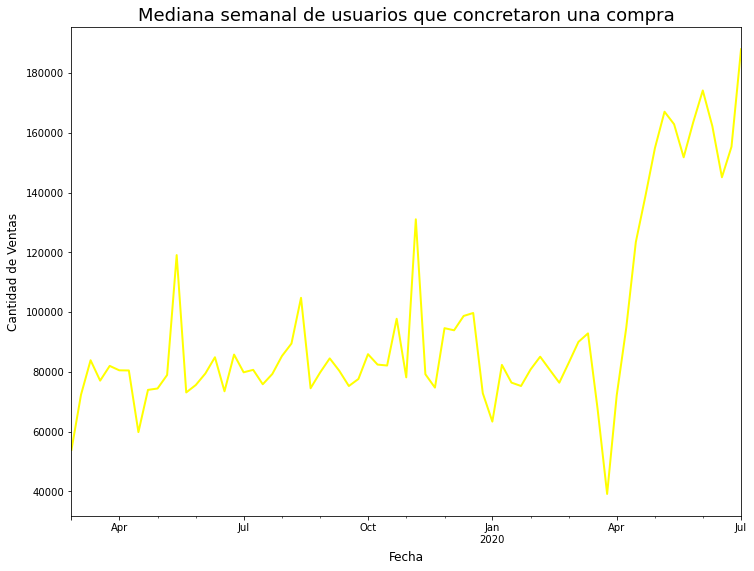

In [58]:
df_traffic_weekly_median=df_traffic.resample("W").median()
df_traffic_weekly_median.Congrats.plot(color = "#ffff00", lw = 2)
plt.title('Mediana semanal de usuarios que concretaron una compra', size = 18)
plt.xlabel('Fecha', size = 12, labelpad = 6)
plt.ylabel('Cantidad de Ventas', size = 12, labelpad = 6)

In [32]:
# Si se quiere ver el comportamiento de las ventas en el año 2020:

Text(0, 0.5, 'Cantidad de Ventas')

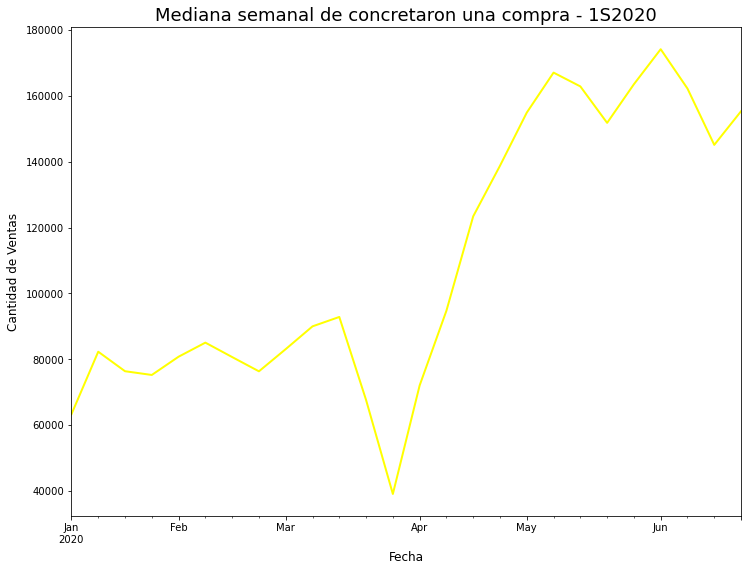

In [59]:
df_traffic_weekly_median['2020-01-01':'2020-06-30'].Congrats.plot(color = "#ffff00", lw = 2)
plt.title('Mediana semanal de concretaron una compra - 1S2020', size = 18)
plt.xlabel('Fecha', size = 12, labelpad = 6)
plt.ylabel('Cantidad de Ventas', size = 12, labelpad = 6)

In [34]:
# Comparación de Histogramas Pre y Post Pandemia

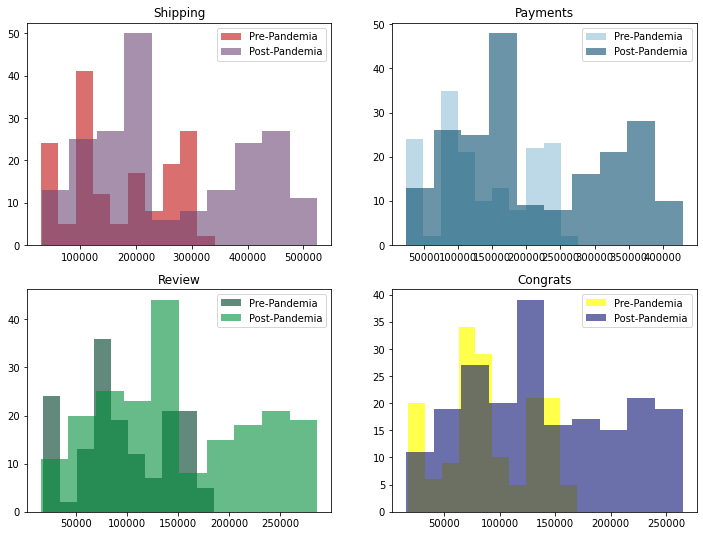

In [35]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(df_traffic['2020-01-01':'2020-03-20']['Shipping'], label='Pre-Pandemia', alpha= 0.7, color= "#cb3234")
axs[0, 0].hist(df_traffic['2020-03-21':'2020-06-30']['Shipping'], label='Post-Pandemia', alpha = 0.6, color= "#6c4675")
axs[0, 0].set_title('Shipping')
axs[0, 0].legend(loc="upper right")
axs[0, 1].hist(df_traffic['2020-01-01':'2020-03-20']['Payments'], label='Pre-Pandemia', alpha = 0.7, color= "#a2cadf")
axs[0, 1].hist(df_traffic['2020-03-21':'2020-06-30']['Payments'], label='Post-Pandemia', alpha = 0.6, color= "#084d6e")
axs[0, 1].set_title('Payments')
axs[0, 1].legend(loc="upper right")
axs[1, 0].hist(df_traffic['2020-01-01':'2020-03-20']['Review'], label='Pre-Pandemia', alpha = 0.7, color= "#1e5945")
axs[1, 0].hist(df_traffic['2020-03-21':'2020-06-30']['Review'], label='Post-Pandemia', alpha = 0.6, color= "#008f39")
axs[1, 0].set_title('Review')
axs[1, 0].legend(loc="upper right")
axs[1, 1].hist(df_traffic['2020-01-01':'2020-03-20']['Congrats'], label='Pre-Pandemia', alpha = 0.7, color= "#ffff00")
axs[1, 1].hist(df_traffic['2020-03-21':'2020-06-30']['Congrats'], label='Post-Pandemia', alpha = 0.6, color= "#0a1172")
axs[1, 1].set_title('Congrats')
axs[1, 1].legend(loc="upper right")

In [36]:
# La comparación de los histogramas en los periodos pre y post pandemia, nos muestran claramente que luego de ser decretada
# la cuarentena en Argentina, la compra online se volvió mas popular. Esto también puede verse en la diferencia de medias para 
# los periodos bajo análisis.

In [57]:
media_pre = df_traffic['2020-01-01':'2020-03-20']['Shipping'].mean()
media_post = df_traffic['2020-03-11':'2020-06-30']['Shipping'].mean()

print('El promedio de usuarios que realizaron una compra en 2 meses y medio antes de la pandemia era de', 
      media_pre, 
      'mientras que el promedio 2 meses y medio luego, fue de',media_post,'.')

El promedio de usuarios que realizaron una compra en 2 meses y medio antes de la pandemia era de 170414.625 mientras que el promedio 2 meses y medio luego, fue de 252926.08035714287 .


In [37]:
# Gráficamente se puede ver observar, por ejemplo, que dada la diferencia en la mediana de cada variable, 
# hay muchos mas usuarios que ingresan a la plataforma que los que terminan concretando una compra.

<AxesSubplot:>

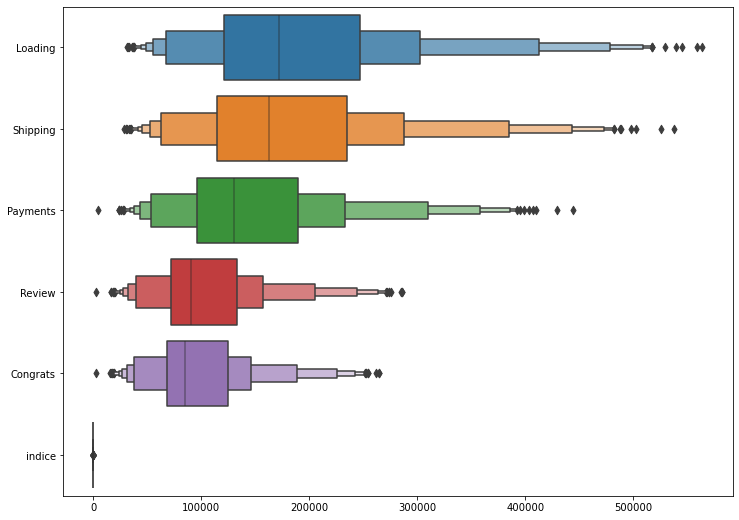

In [38]:
sns.boxenplot(data=df_traffic, orient="h")

Text(0.5, 1.0, 'Desktop')

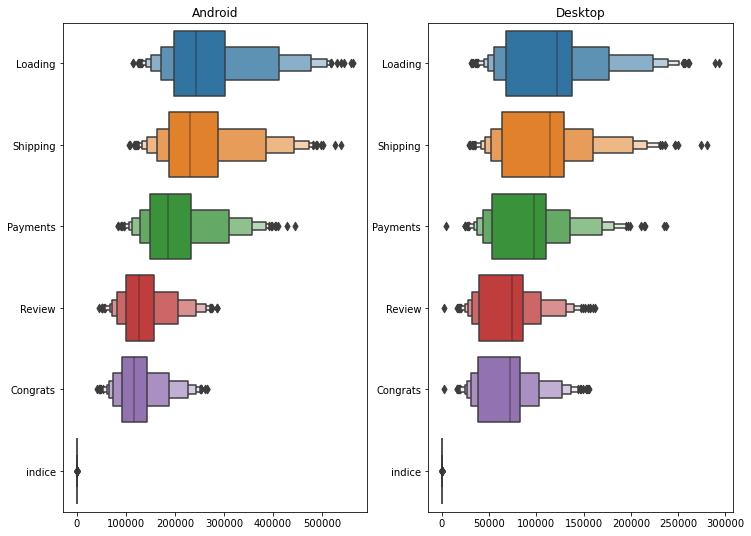

In [41]:
f, axes = plt.subplots(1, 2)
sns.boxenplot(data=df_traffic[df_traffic.Device=="Android"], orient="h", ax=axes[0]).set_title('Android')
sns.boxenplot(data=df_traffic[df_traffic.Device=="Desktop"], orient="h", ax=axes[1]).set_title('Desktop')

In [ ]:
# Se puede observar en el caso de Desktop como los datos para cada etapa presentan Asimetría negativa. 
# Los datos se concentran en la parte superior de la distribución y la mediana suele ser mayor que la media. Esto supondría
# que la media se encuentra sesgada por valores que escapan de lo normal, por lo que la mediana suele ser mas representativa
# del comportamiento de la variable.

In [ ]:
# Algunas medidas descriptivas:

In [42]:
df_traffic.groupby(["Site","flow","Device"]).describe().Congrats

count                 mean  \
Site flow   Device                                              
MLA  direct Android               488.00           124,947.73   
            Desktop               488.00            69,503.27   

                                     std                  min  \
Site flow   Device                                              
MLA  direct Android            48,550.66            41,229.00   
            Desktop            31,425.06             2,538.00   

                                     25%                  50%  \
Site flow   Device                                              
MLA  direct Android            91,602.75           116,846.50   
            Desktop            38,027.00            72,425.00   

                                     75%                  max  
Site flow   Device                                             
MLA  direct Android           143,761.25           264,742.00  
            Desktop            83,054.00           155,820.00

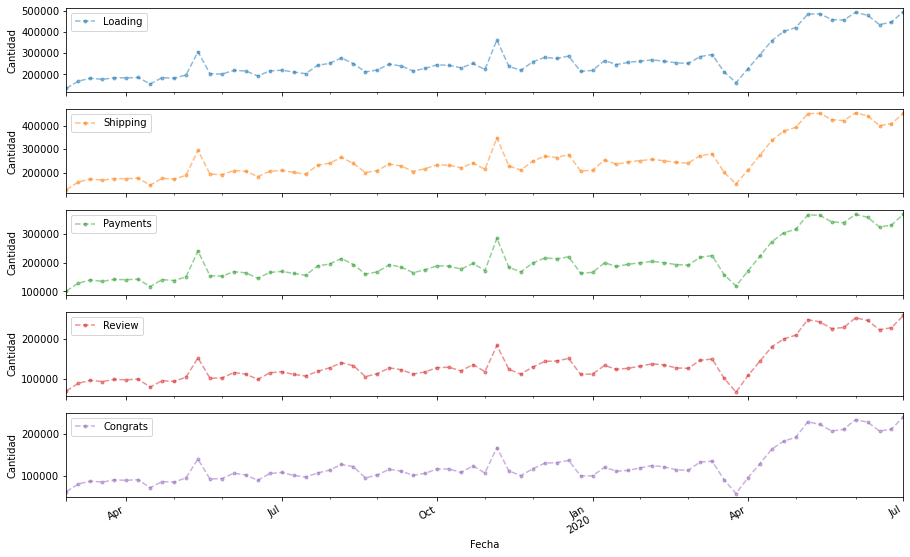

In [43]:
df_traffic_android_weekly_mean=df_traffic_android.resample("w").mean()

cols_plot = ['Loading', 'Shipping', 'Payments', 'Review', 'Congrats']

axes = df_traffic_android_weekly_mean[cols_plot].plot(marker='.', alpha=0.5, linestyle='--', figsize=(15,10), subplots=True)
for ax in axes:
    ax.set_ylabel('Cantidad')

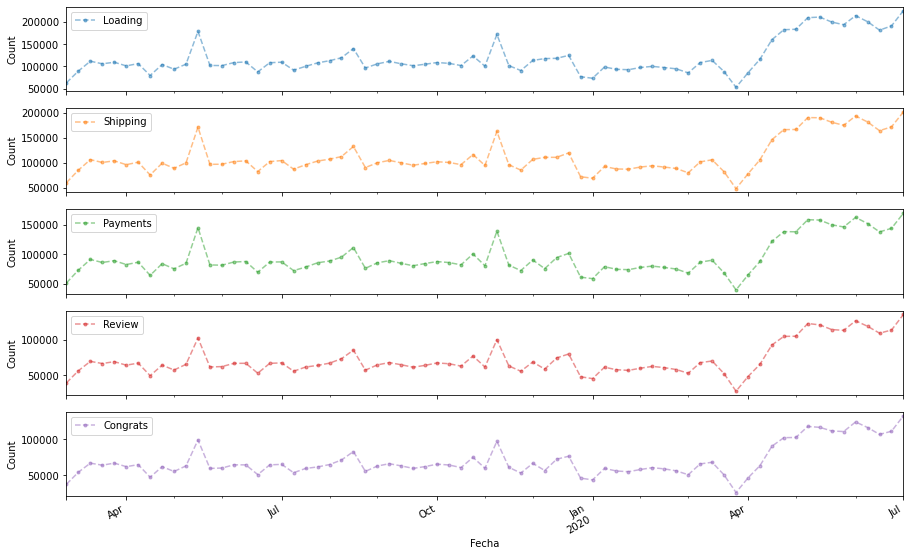

In [44]:
df_traffic_desktop_weekly_mean=df_traffic_desktop.resample("W").mean()

cols_plot = ['Loading', 'Shipping', 'Payments', 'Review', 'Congrats']

axes = df_traffic_desktop_weekly_mean[cols_plot].plot(marker='.', alpha=0.5, linestyle='--', figsize=(15,10), subplots=True)
for ax in axes:
    ax.set_ylabel('Count')